# Import Dependencies

In [1]:
# For clean-up & plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# For tables & chart to show in PDF download

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# For hyperlinks to show in PDF download

from IPython.core.display import HTML

# Load Data

In [2]:
nyc_data = "RawData/nyc_data.csv"
bos_data = "RawData/bos_data.csv"
mia_data = "RawData/mia_data.csv"
glo_data = "RawData/global_data.csv"

nyc = pd.read_csv(nyc_data)
bos = pd.read_csv(bos_data)
mia = pd.read_csv(mia_data)
glo = pd.read_csv(glo_data)

# Clean Data

## Selected Cities' Data

### NYC Data

In [3]:
display(nyc.head())

,year,city,country,avg_temp
0,1743,New York,United States,3.26
1,1744,New York,United States,11.66
2,1745,New York,United States,1.13
3,1746,New York,United States,NaN
4,1747,New York,United States,NaN


In [4]:
# Drop Null Values

nyc.dropna(inplace=True)


# Update Column Names

nyc_update = nyc.rename(columns={"year": 'Year', 
                                 "city": 'City', 
                                 "country": 'Country', 
                                 "avg_temp": 'NYC Temp. (C°)'})

# Reset Index

nyc_df = nyc_update.reset_index(drop=True)

display(nyc_df.head())

,Year,City,Country,NYC Temp. (C°)
0,1743,New York,United States,3.26
1,1744,New York,United States,11.66
2,1745,New York,United States,1.13
3,1750,New York,United States,10.07
4,1751,New York,United States,10.79


### Boston Data

In [5]:
display(bos.head())

,year,city,country,avg_temp
0,1743,Boston,United States,1.19
1,1744,Boston,United States,9.63
2,1745,Boston,United States,-1.37
3,1746,Boston,United States,NaN
4,1747,Boston,United States,NaN


In [6]:
# Drop Null Values

bos.dropna(inplace=True)


# Update Column Names

bos_update = bos.rename(columns={"year": 'Year', 
                                 "city": 'City', 
                                 "country": 'Country', 
                                 "avg_temp": 'BOS Temp. (C°)'})

# Reset Index

bos_df = bos_update.reset_index(drop=True)

display(bos_df.head())

,Year,City,Country,BOS Temp. (C°)
0,1743,Boston,United States,1.19
1,1744,Boston,United States,9.63
2,1745,Boston,United States,-1.37
3,1750,Boston,United States,7.88
4,1751,Boston,United States,8.60


### Miami Data

In [7]:
display(mia.head())

,year,city,country,avg_temp
0,1758,Miami,United States,23.05
1,1759,Miami,United States,22.56
2,1760,Miami,United States,15.14
3,1761,Miami,United States,NaN
4,1762,Miami,United States,NaN


In [8]:
# Drop Null Values

mia.dropna(inplace=True)


# Update Column Names

mia_update = mia.rename(columns={"year": 'Year', 
                                 "city": 'City', 
                                 "country": 'Country', 
                                 "avg_temp": 'MIA Temp. (C°)'})

# Reset Index

mia_df = mia_update.reset_index(drop=True)

display(mia_df.head())

,Year,City,Country,MIA Temp. (C°)
0,1758,Miami,United States,23.05
1,1759,Miami,United States,22.56
2,1760,Miami,United States,15.14
3,1768,Miami,United States,21.77
4,1769,Miami,United States,22.57


## Global Data

In [9]:
display(glo.head())

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [10]:
# Check for null values

glo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [11]:
# Update Column Names

glo_df = glo.rename(columns={"year": 'Year', 
                             "avg_temp": 'Global Temp. (C°)'})

display(glo_df.head())

,Year,Global Temp. (C°)
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


## Merge ALL Tables

In [12]:
# Merge

merge1 = pd.merge(nyc_df, bos_df, on="Year", how="left")
merge2 = pd.merge(merge1, mia_df, on="Year", how="left")
final_merge = pd.merge(merge2, glo_df, on="Year", how="left")

# Review column names to drop

final_merge.columns

Index(['Year', 'City_x', 'Country_x', 'NYC Temp. (C°)', 'City_y', 'Country_y',
       'BOS Temp. (C°)', 'City', 'Country', 'MIA Temp. (C°)',
       'Global Temp. (C°)'],
      dtype='object')

In [13]:
# Drop Irrelevant Columns

data_df = final_merge.drop(columns=['City_x', 'Country_x', 'City_y', 'Country_y', 'City', 'Country'])


# Drop Null Values

data_df.dropna(inplace=True)


# Reset Index 

cities = data_df.reset_index(drop=True)

# Drop rows to only display 1913 - 2013 (100-year period)

cities_df = cities.drop(cities.index[range(143)])

display(cities_df.head())

,Year,NYC Temp. (C°),BOS Temp. (C°),MIA Temp. (C°),Global Temp. (C°)
143,1913,10.76,8.58,23.29,8.30
144,1914,9.02,6.89,22.80,8.59
145,1915,9.85,7.98,22.66,8.59
146,1916,9.10,7.05,23.02,8.23
147,1917,8.24,6.04,22.59,8.02


In [14]:
# Get entry count

index = cities_df.index
cities_count = len(index)

print(cities_count)

101


# Find the Moving Average

In [15]:
# Calculate the moving average for all

nyc_ma = cities_df["NYC Temp. (C°)"].rolling(15, min_periods=1).mean()
bos_ma = cities_df["BOS Temp. (C°)"].rolling(15, min_periods=1).mean()
mia_ma = cities_df["MIA Temp. (C°)"].rolling(15, min_periods=1).mean()
glo_ma = cities_df["Global Temp. (C°)"].rolling(15, min_periods=1).mean()
years = cities_df["Year"]


# Add values to a new DataFrame

ma_df = pd.DataFrame({'NYC M.A. (C°)': nyc_ma, 
                      'BOS M.A. (C°)': bos_ma, 
                      'MIA M.A. (C°)': mia_ma, 
                      'Global M.A. (C°)': glo_ma, 
                      'Year': years})

display(ma_df.head())

,NYC M.A. (C°),BOS M.A. (C°),MIA M.A. (C°),Global M.A. (C°),Year
143,10.760000,8.580000,23.290000,8.300000,1913
144,9.890000,7.735000,23.045000,8.445000,1914
145,9.876667,7.816667,22.916667,8.493333,1915
146,9.682500,7.625000,22.942500,8.427500,1916
147,9.394000,7.308000,22.872000,8.346000,1917


In [16]:
# Round values to 2 decimal points

round_df = ma_df.round({'NYC M.A. (C°)': 2, 
                        'BOS M.A. (C°)': 2, 
                        'MIA M.A. (C°)': 2, 
                        'Global M.A. (C°)': 2})

display(round_df.head())

,NYC M.A. (C°),BOS M.A. (C°),MIA M.A. (C°),Global M.A. (C°),Year
143,10.76,8.58,23.29,8.30,1913
144,9.89,7.74,23.04,8.44,1914
145,9.88,7.82,22.92,8.49,1915
146,9.68,7.62,22.94,8.43,1916
147,9.39,7.31,22.87,8.35,1917


In [17]:
# Set 'Year' column as the index 

mulcities_df = round_df.set_index('Year')

mulcities_df.to_csv("../project_1/Output/MultipleCitiesDataset.csv", index=True)

display(mulcities_df.head())

,NYC M.A. (C°),BOS M.A. (C°),MIA M.A. (C°),Global M.A. (C°)
Year,,,,
1913,10.76,8.58,23.29,8.30
1914,9.89,7.74,23.04,8.44
1915,9.88,7.82,22.92,8.49
1916,9.68,7.62,22.94,8.43
1917,9.39,7.31,22.87,8.35


# Calculate Descriptive Statistics

## Mean

In [18]:
mean = mulcities_df.mean()

print(mean)

NYC M.A. (C°)       10.018515
BOS M.A. (C°)        7.910297
MIA M.A. (C°)       23.314752
Global M.A. (C°)     8.729307
dtype: float64


## Median

In [19]:
median = mulcities_df.median()

print(median)

NYC M.A. (C°)        9.97
BOS M.A. (C°)        7.86
MIA M.A. (C°)       23.23
Global M.A. (C°)     8.65
dtype: float64


## Mode

In [20]:
mode = mulcities_df.mode()

# Convert column names to index

mode_2 = mode.transpose()

# Convert '0' to a string & rename

mode_3 = mode_2.rename(columns = {0:'Mode'}, inplace=True)

mode_4 = pd.DataFrame(mode_3, columns=['Mode'])

# Convert DataFrame to a float64

mode_df = mode_2["Mode"].astype(str).astype('float64')

print(mode_df)

NYC M.A. (C°)        9.85
BOS M.A. (C°)        7.75
MIA M.A. (C°)       23.20
Global M.A. (C°)     8.65
Name: Mode, dtype: float64


## Minimum

In [21]:
df_min = mulcities_df.min()

print(df_min)

NYC M.A. (C°)        9.39
BOS M.A. (C°)        7.28
MIA M.A. (C°)       22.87
Global M.A. (C°)     8.30
dtype: float64


## Maximum

In [22]:
df_max = mulcities_df.max()

print(df_max)

NYC M.A. (C°)       10.93
BOS M.A. (C°)        8.88
MIA M.A. (C°)       23.82
Global M.A. (C°)     9.50
dtype: float64


## Range

In [23]:
df_range = df_max - df_min

print(df_range)

NYC M.A. (C°)       1.54
BOS M.A. (C°)       1.60
MIA M.A. (C°)       0.95
Global M.A. (C°)    1.20
dtype: float64


## Skewness

In [24]:
skew = mulcities_df.skew()

print(skew)

NYC M.A. (C°)       0.547463
BOS M.A. (C°)       0.504626
MIA M.A. (C°)       0.583991
Global M.A. (C°)    1.069131
dtype: float64


## Standard Deviation

In [25]:
stan_dev = mulcities_df.std()

print(stan_dev)

NYC M.A. (C°)       0.329938
BOS M.A. (C°)       0.342311
MIA M.A. (C°)       0.255740
Global M.A. (C°)    0.293381
dtype: float64


## Add to a DataFrame

In [26]:
stats = pd.DataFrame({'Mean': mean, 
                      'Median': median, 
                      'Mode': mode_df,
                      'Min': df_min, 
                      'Max': df_max, 
                      'Range': df_range, 
                      'Skew': skew, 
                      'Standard Deviation': stan_dev})

stats_df = stats.round({'Mean': 2, 
                        'Median': 2, 
                        'Mode': 2, 
                        'Min': 2, 
                        'Max': 2, 
                        'Range': 2, 
                        'Skew': 2, 
                        'Standard Deviation': 2})

# Visualize The Data

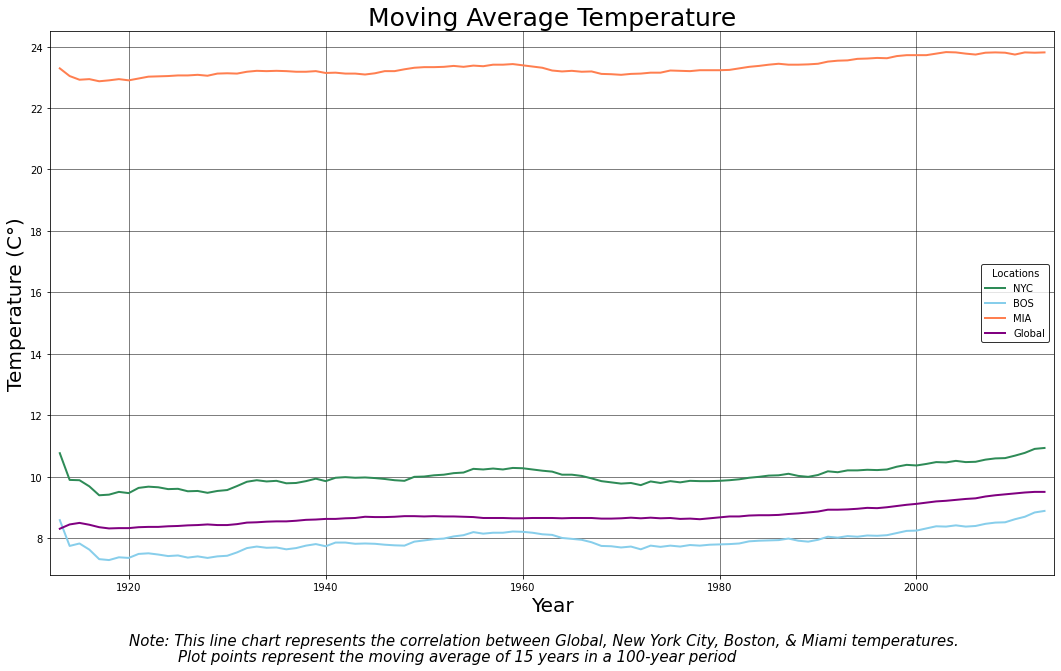

In [27]:
# Build Line Chart


## Plot the chart
mulcities_df.plot(linestyle='-', 
                  color=['seagreen', 'skyblue', 'coral', 'purple'], 
                  figsize=(18, 10), 
                  linewidth=2)

## Add chart properties

### Labels

plt.title('Moving Average Temperature', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature (C°)', fontsize=20)

### Add a blurb describing the chart's purpose

plt.text(1920, 4.5, 
         "Note: This line chart represents the correlation between Global, New York City, Boston, & Miami temperatures.", 
         fontsize=15, 
         style='italic')
plt.text(1925, 4.0, 
         "Plot points represent the moving average of 15 years in a 100-year period", 
         fontsize=15, 
         style='italic')

### Grid

plt.grid(linewidth=0.5, color='black')
plt.xticks()
plt.yticks()

plt.xlim(1912, 2014)
plt.ylim(6.8, 24.5)


### Legend
legend = plt.legend(title = "Locations", 
                    frameon=True, 
                    edgecolor='black', 
                    labels=['NYC', 'BOS', 'MIA', 'Global'])


# Save Chart
plt.savefig("../project_1/Output/TrendsPlot2.png", bbox_inches='tight')

plt.show()

# Observations

## Statistics

In [28]:
display(stats_df)

,Mean,Median,Mode,Min,Max,Range,Skew,Standard Deviation
NYC M.A. (C°),10.02,9.97,9.85,9.39,10.93,1.54,0.55,0.33
BOS M.A. (C°),7.91,7.86,7.75,7.28,8.88,1.60,0.50,0.34
MIA M.A. (C°),23.31,23.23,23.20,22.87,23.82,0.95,0.58,0.26
Global M.A. (C°),8.73,8.65,8.65,8.30,9.50,1.20,1.07,0.29


## Are your cities hotter or cooler on average compared to the global average? Has the difference been consistent over time?

#### - New York City & Miami, on average, are consistently hotter than the Global temperature while Boston is consistently cooler.

## How do the changes in your cities' temperatures over time compare to the changes in the global average?

#### - New York: New York City's average temperatures fluctuate from hotter temperatures (11° C), to cooler ones (9.5° C). Then the temperatures gradually increase to 10.9 - 11° C.

#### - Boston: Boston's average temperatures fluctuate from hotter temperatures (8.5° C), to cooler ones (7° C). Then the temperatures gradually increase to 8.5° C. This is expected as New England weather is generally colder than most states in the Northeast.

#### - Miami: Miami's average temperatures fluctuate between hotter temperatures 22.5° C & 23° C. Then the temperatures remain just above 23.5° C at first, then gradually increase to just below 24° C. This is expected as Florida has a tropical climate.

#### - Global: The global average temperatures fluctuate between cooler temperatures 8° C and 8.5° C. Then the temperatures gradually increase about 9.8° C.

## What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

#### - The world is getting hotter over the progressing years. This has been a consistent, gradual increase.

#### - You'll notice that Boston has the lowest temperatures between the 1913 - 2013.

# Citations

## To Review the Data

#### Clean-Up: [Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

#### Moving Average: [Rolling Method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

## To Plot the Chart

#### Line Graph: [Python Graph Gallery](https://www.python-graph-gallery.com/121-line-chart-customization)

## To Export to PDF

#### How-To: [Open Library](https://ecampusontario.pressbooks.pub/rwsnotes/back-matter/getting-started-with-jupyter-notebooks/)

#### Download Link: [MacTex](http://tug.org/mactex/mactex-download.html)

#### To Embed Hyperlinks: [StackOverflow](https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output)